# Polynomial Regression

Formula -> y_pred = ax^2 + bx + c 

In [89]:
import numpy as np

m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

In [90]:
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree = 2, include_bias = False)
X_poly = poly_features.fit_transform(X)

In [91]:
from sklearn.linear_model import LinearRegression

lgr = LinearRegression()

lgr.fit(X_poly, y)

LinearRegression()

In [92]:
lgr.intercept_

array([1.52757779])

In [93]:
lgr.coef_

array([[0.89126652, 0.60290367]])

In [94]:
pred = lgr.predict(X_poly)

In [95]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(lgr, X_poly, y, cv=12)

In [96]:
scores

array([ 0.94103462,  0.85126771,  0.73265599,  0.66821608,  0.89749584,
        0.97488138,  0.90564124,  0.71772571,  0.90740674,  0.96177133,
       -0.02935221,  0.83138383])

In [97]:
from sklearn.model_selection import cross_val_predict

prediction = cross_val_predict(lgr, X_poly, y, cv=3)

In [98]:
lgr.score(X_poly, y)

0.8769742411072069

In [103]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))
    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="val")
    return 0



0

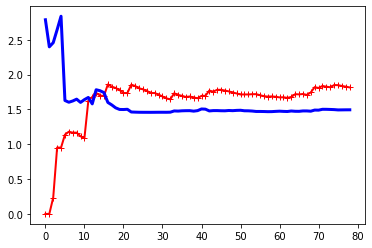

In [104]:
plot_learning_curves(lgr, X, y)